In [15]:
import sklearn.datasets as sdat
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as sclust
import sklearn.metrics as smet

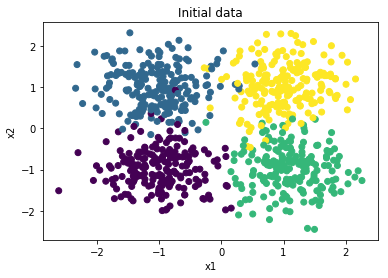

In [2]:
x,y=sdat.make_blobs(n_samples=800,centers=[[-1,-1],[-1,1],[1,-1],[1,1]],cluster_std=0.5,random_state=42)

plt.scatter(x[:,0],x[:,1],c=y)
plt.title('Initial data')
plt.xlabel('x1')
plt.ylabel('x2');

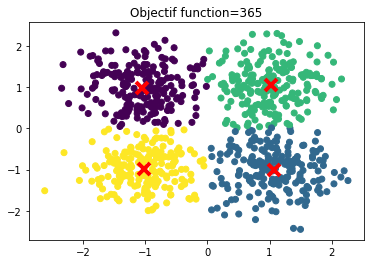

In [6]:
c=4

res=sclust.KMeans(n_clusters=c).fit(x)

plt.scatter(x[:,0],x[:,1],c=res.labels_)
plt.plot(res.cluster_centers_[:,0],res.cluster_centers_[:,1],'xr',markersize=12,markeredgewidth=4)
plt.title("Objectif function="+str(int(res.inertia_)));

In [13]:
c_range=range(2,10)

res_k=[sclust.KMeans(n_clusters=k,n_init=5).fit(x) for k in c_range]
meas_sil_k=[smet.silhouette_score(x,resk.labels_) for resk in res_k]
J_k=[resk.inertia_ for resk in res_k]

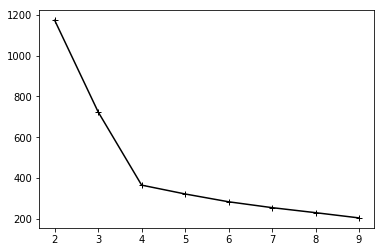

In [14]:
#plt.plot(c_range,meas_sil_k,'.-k')
plt.plot(c_range,J_k,'+-k')

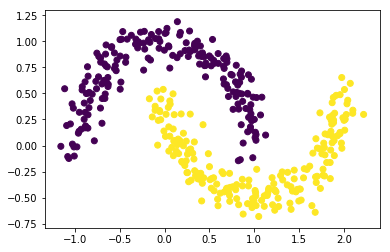

In [25]:
x,y=sdat.make_moons(n_samples=400,noise=0.1)

plt.scatter(x[:,0],x[:,1],c=y);

In [52]:
c=2
resKM=sclust.KMeans(n_clusters=c).fit(x)
silKM=smet.silhouette_score(x,resKM.labels_)

from scipy.cluster import hierarchy
linkageName='complete'
dendroCL=hierarchy.linkage(x,linkageName)
resCL=hierarchy.fcluster(dendroCL,criterion='maxclust',t=2)
silCL=smet.silhouette_score(x,resCL)

resDB=sclust.DBSCAN(eps=0.2,min_samples=15).fit(x)
silDB=smet.silhouette_score(x,resDB.labels_)

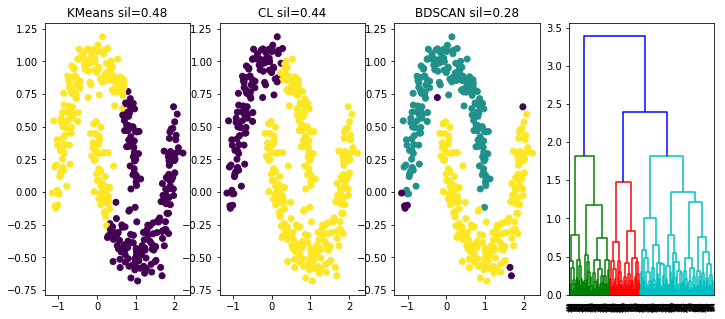

In [53]:
plt.figure(figsize=(12,5))

plt.subplot(1,4,1)
plt.scatter(x[:,0],x[:,1],c=resKM.labels_)
plt.title("KMeans sil="+str(np.round(silKM,2)))

plt.subplot(1,4,2)
plt.scatter(x[:,0],x[:,1],c=resCL)
plt.title("CL sil="+str(np.round(silCL,2)))

plt.subplot(1,4,3)
plt.scatter(x[:,0],x[:,1],c=resDB.labels_)
plt.title("BDSCAN sil="+str(np.round(silDB,2)))

plt.subplot(1,4,4)
hierarchy.dendrogram(dendroCL);

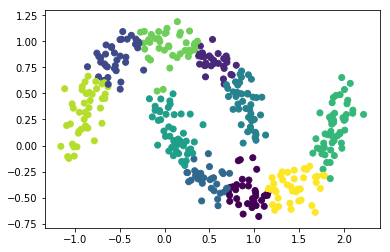

In [59]:
# Variants of KMeans
bandwidth=sclust.estimate_bandwidth(x,quantile=0.1)
resMS=sclust.MeanShift(bandwidth=bandwidth).fit(x)

plt.scatter(x[:,0],x[:,1],c=resMS.labels_);

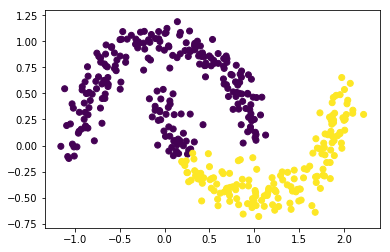

In [61]:
resSP=sclust.SpectralClustering(n_clusters=2,affinity="nearest_neighbors",n_neighbors=25).fit(x)

plt.scatter(x[:,0],x[:,1],c=resSP.labels_);